In [2]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [3]:
qc = QuantumCircuit(2,1)

qc.x(0)
qc.barrier()
qc.h(0)
qc.h(1)
#identity function f(x)=x
qc.cx(1,0)
qc.barrier()
qc.h(1) 
qc.measure(1,0)

qc.draw()

┌───┐ ░ ┌───┐┌───┐ ░         
q_0: ┤ X ├─░─┤ H ├┤ X ├─░─────────
     └───┘ ░ ├───┤└─┬─┘ ░ ┌───┐┌─┐
q_1: ──────░─┤ H ├──■───░─┤ H ├┤M├
           ░ └───┘      ░ └───┘└╥┘
c: 1/═══════════════════════════╩═
                                0

The following code loads the account and specifies the least busy computer.

Real hardware devices need to be recalibrated regularly, and the fidelity of a specific qubit or gate can change over time. Furthermore, different chips have different qubit connectivity. If we try to run a circuit that performs a two-qubit gate between two qubits that are not connected on the specified device, the transpiler will add SWAP gates. Therefore it is good practice to check with the IBM Quantum Experience webpage before running

In [4]:
from qiskit import IBMQ, transpile
from qiskit_ibm_provider import IBMProvider, least_busy

provider = IBMProvider()
device=provider.backends(min_num_qubits=5, simulator=False, operational=True)
backend = least_busy(device)
print("least busy backend: ", backend)


least busy backend:  <IBMBackend('ibmq_lima')>


In [5]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 100
transpiled_bv_circuit = transpile(qc, backend)
job = backend.run(transpiled_bv_circuit, shots=shots)

job_monitor(job, interval=2)

Job Status: job has successfully run



Total count are: {'0': 4, '1': 96}


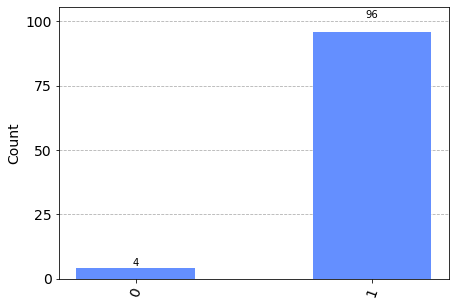

In [6]:
# Get the results from the computation
results = job.result()
counts = results.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)